In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
!pip install scikit-surprise


In [45]:
rating = pd.read_csv('/content/Ratings.csv', low_memory=False)
users = pd.read_csv('/content/Users.csv', low_memory=False)
books = pd.read_csv('/content/Books.csv', low_memory=False)




In [46]:
books = books[~books['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])

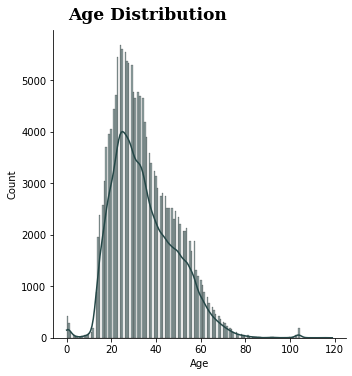

In [47]:
def plot_distribution(feature, data):
    sns.displot(x=feature, data=data, kde=True, color='#244747');
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='serif', fontsize=17, fontweight='bold');
users = users[users['Age']<=120]
plot_distribution('Age', users)

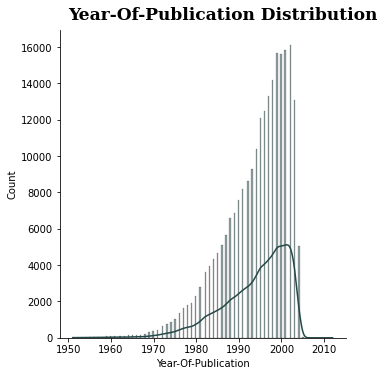

In [48]:
books = books[(books['Year-Of-Publication']>1950) & (books['Year-Of-Publication']<=2016)]
plot_distribution('Year-Of-Publication', books)

In [49]:
data = rating.groupby('ISBN').agg(['mean', 'count'])['Book-Rating'].reset_index()
m = data['count'].quantile(0.99)
data = data[data['count']>m]
print('m =', m)
print(data.shape)
R = data['mean'] 
v = data['count']
C = data['mean'].mean() 
data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)
data = pd.merge(data, books, on='ISBN')[['Book-Title', 'Book-Author', 'mean', 'count', 'weighted rating', 
                              'Year-Of-Publication']].drop_duplicates('Book-Title').iloc[:20]
data

m = 36.0
(3306, 3)


,Book-Title,Book-Author,mean,count,weighted rating,Year-Of-Publication
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.541237,194,5.985285,2000
1,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,6.611765,170,5.978717,1999
2,Free,Paul Vincent,7.962963,54,5.973507,2003
3,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,6.467005,197,5.929681,1999
4,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,6.363095,168,5.767724,1998
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.571856,334,5.320583,2003
6,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,6.206349,63,5.036522,1999
7,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,6.041667,72,5.024219,1991
9,Falling Up,Shel Silverstein,6.921053,38,5.008320,1996
10,The Stand (The Complete and Uncut Edition),Stephen King,6.175439,57,4.942104,1990


In [50]:
books = books.drop_duplicates(['Book-Author', 'Book-Title'])
data = pd.merge(books, rating, on='ISBN')[['Book-Author', 'Book-Rating', 'Book-Title', 'ISBN']]

data = data.groupby('Book-Author').agg(['mean', 'count'])['Book-Rating'].reset_index()
m = data['count'].quantile(0.99) 
data = data[data['count']>m]
print('m =', m)
print(data.shape)
R = data['mean']
v = data['count'] 
C = data['mean'].mean() 
data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)

data.iloc[:20]


m = 141.0
(901, 3)


,Book-Author,mean,count,weighted rating
0,J. K. Rowling,5.409283,2133,5.250465
1,Bill Watterson,5.498134,536,4.946169
2,J. R. R. Tolkien,5.280061,657,4.850322
3,Shel Silverstein,6.248322,149,4.595023
4,Dr. Seuss,5.174515,361,4.521029
5,Nick Bantock,5.320755,265,4.461962
6,Harper Lee,4.932039,412,4.400645
7,J.R.R. TOLKIEN,4.511224,980,4.302013
8,Neil Gaiman,4.456680,1235,4.291829
9,Daniel Quinn,5.012295,244,4.219628


In [51]:
data = pd.merge(rating, books, on='ISBN')
data['count'] = data.groupby('ISBN').transform('count')['User-ID']
isbn = data.drop_duplicates('ISBN').sort_values(
    'count', ascending=False).iloc[:100]['ISBN']
data = data[data['ISBN'].isin(isbn)].reset_index(drop=True)


In [52]:
df = data.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
df.head()

ISBN,0060392452,0060502258,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060987103,0061009059,0140293248,0142000205,0142001740,0312195516,0312278586,0312305060,0312983271,0316096199,0316284955,0316601950,0316666343,0316769487,0316776963,0345313860,0345337662,0345339681,0345339703,0345342968,0345351525,0345353145,0345361792,0345370775,0345378490,0345380371,0345391055,0345417623,0345443284,0375700757,0375706771,0375725784,...,0440226104,0440234743,0440236673,044023722X,0440241073,0446310786,0446364193,044651652X,0446605239,0446608955,0446610038,0446611212,0446612545,0446672211,0449212602,0452282152,0452282829,0515131229,0553268880,0553279912,0553572997,059035342X,0671001795,0671003755,0671021001,0671027360,0671510053,0679429220,0684872153,0684874350,0743237188,0743418174,0786868716,080410526X,0804106304,0805063897,0842329129,0971880107,1400034779,1558743669
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
temp = df[~df.isna()].count(axis=1).reset_index()
temp[temp[0]>50]

,User-ID,0
629,11676,100
912,16795,70
1158,21014,54
1323,23768,54
2131,35859,69
2647,43246,54
3682,60244,53
4628,76352,54
4769,78783,51
6170,102967,54


In [54]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate

In [55]:
reader = Reader(rating_scale=(0, 10))
surprise_data = Dataset.load_from_df(data[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.25)

In [56]:
benchmark = []
for algorithm in [SVD()]:
    results = cross_validate(algorithm, surprise_data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,3.921047,1.680262,0.107684


In [57]:
svd = SVD() 
svd.fit(trainset)

In [58]:
index_val = 2131
userId = df.index[index_val]
books = []
ratings = []
titles = []

for isbn in df.iloc[index_val][df.iloc[index_val].isna()].index:
    books.append(isbn)
    title = data[data['ISBN']==isbn]['Book-Title'].values[0]
    titles.append(title)
    ratings.append(svd.predict(userId, isbn).est)

prediction = pd.DataFrame({'ISBN':books, 'title':titles, 'rating':ratings, 'userId':userId})  
prediction = prediction.sort_values('rating', ascending=False).iloc[:10].reset_index(drop=True)

temp = data[data['User-ID']==df.index[index_val]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
prediction['Book Read'] = temp['Book-Title']
prediction['Rated']= temp['Book-Rating']
prediction

,ISBN,title,rating,userId,Book Read,Rated
0,0345339681,The Hobbit : The Enchanting Prelude to The Lor...,7.701157,35859,Fahrenheit 451,10
1,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",6.731370,35859,Harry Potter and the Sorcerer's Stone (Harry P...,10
2,0312305060,The Hours: A Novel,5.297227,35859,One for the Money (Stephanie Plum Novels (Pape...,10
3,0786868716,The Five People You Meet in Heaven,4.930719,35859,The Red Tent (Bestselling Backlist),10
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),4.497390,35859,Bel Canto: A Novel,9
5,0140293248,The Girls' Guide to Hunting and Fishing,4.073923,35859,The Secret Life of Bees,9
6,0345337662,Interview with the Vampire,3.745209,35859,Left Behind: A Novel of the Earth's Last Days ...,9
7,0345339703,The Fellowship of the Ring (The Lord of the Ri...,3.674963,35859,The Joy Luck Club,8
8,0684872153,Angela's Ashes (MMP) : A Memoir,3.229151,35859,Two for the Dough,8
9,0743237188,Fall On Your Knees (Oprah #45),3.146878,35859,Balzac and the Little Chinese Seamstress : A N...,8
